In [2]:

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,accuracy_score,mean_squared_log_error
from sklearn.metrics import roc_curve, auc,roc_auc_score,mean_squared_error
import xgboost as xgb
from numpy.linalg import inv
from xgboost.sklearn import XGBClassifier,XGBRegressor
from sklearn.kernel_ridge import KernelRidge
import matplotlib.dates
import operator
from quilt.data.ResidentMario import missingno_data 
import missingno as msno


C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
train = pd.read_csv("transformed_train1.csv")
test  = pd.read_csv("transformed_test1.csv")

In [7]:
itrain,itest = train_test_split(range(train.shape[0]),train_size=0.8,random_state = 2017)
mask = np.ones(train.shape[0],dtype='int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask==1)

In [9]:
train.tail()

,bandgap_energy_ev,formation_energy_ev_natom,id,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,number_of_total_atoms,...,clusters_of_lattices_9,area,area_bucket,atomic_density,nota_10.0,nota_20.0,nota_30.0,nota_40.0,nota_60.0,nota_80.0
2393,3.7349,0.0381,2396,90.0038,90.0023,90.0015,4.9469,8.5014,9.1298,40.0,...,0,49.581828,1,0.104178,0,0,0,1,0,0
2394,3.4915,0.0670,2397,89.9938,90.0075,120.0007,4.9566,4.9562,13.4178,30.0,...,0,58.568657,2,0.091014,0,0,1,0,0,0
2395,3.2750,0.0906,2398,90.0047,90.0046,89.9954,9.2204,9.2200,9.2199,80.0,...,0,73.623044,2,0.102066,0,0,0,0,0,1
2396,1.3915,0.2566,2399,90.0015,89.9996,90.0004,10.6529,9.0954,9.7210,80.0,...,1,83.561571,3,0.084936,0,0,0,0,0,1
2397,4.2107,0.1135,2400,90.0027,90.0037,89.9987,9.0648,9.0641,9.0643,80.0,...,0,71.157657,2,0.107417,0,0,0,0,0,1


In [10]:
train.columns

Index(['bandgap_energy_ev', 'formation_energy_ev_natom', 'id',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang', 'number_of_total_atoms',
       'percent_atom_al', 'percent_atom_ga', 'percent_atom_in', 'spacegroup',
       'train_or_not', 'one_to_two', 'one_to_three', 'two_to_three',
       'bucket_sg_ratio_1', 'bucket_sg_ratio_2', 'clusters_of_lattices',
       'clusters_of_lattices_0', 'clusters_of_lattices_1',
       'clusters_of_lattices_2', 'clusters_of_lattices_3',
       'clusters_of_lattices_4', 'clusters_of_lattices_5',
       'clusters_of_lattices_6', 'clusters_of_lattices_7',
       'clusters_of_lattices_8', 'clusters_of_lattices_9', 'area',
       'area_bucket', 'atomic_density', 'nota_10.0', 'nota_20.0', 'nota_30.0',
       'nota_40.0', 'nota_60.0', 'nota_80.0'],
      dtype='object')

In [67]:
features = ['lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang', 'number_of_total_atoms','spacegroup','one_to_two', 'one_to_three', 'two_to_three',
       'bucket_sg_ratio_1', 'bucket_sg_ratio_2', 'clusters_of_lattices',
       'clusters_of_lattices_0', 'clusters_of_lattices_1',
       'clusters_of_lattices_2', 'clusters_of_lattices_3',
       'clusters_of_lattices_4', 'clusters_of_lattices_5',
       'clusters_of_lattices_6', 'clusters_of_lattices_7',
       'clusters_of_lattices_8', 'clusters_of_lattices_9','area_bucket', 'atomic_density', 'nota_10.0', 'nota_20.0', 'nota_30.0',
       'nota_40.0', 'nota_60.0', 'nota_80.0']

In [12]:
target1 = 'bandgap_energy_ev'
target2 = 'formation_energy_ev_natom'

In [13]:
def calculate_rmsle(y_predicted,y_actual):
    return (np.sqrt(np.mean((np.log1p(y_predicted) - np.log1p(y_actual))**2)))

In [14]:
def try_Kernel_Ridge(train,mask,features,target,kernel = "linear",alpha = 1.0,degree = 2,gamma = 3):
    clf = KernelRidge(kernel=kernel,alpha=alpha,degree=degree,gamma=gamma)
    X = train[features]
    Y = train[target]
    train_x = X[mask].values
    test_x  = X[~mask].values
    train_y = Y[mask].values
    test_y = Y[~mask].values
    train_y = np.log1p(train_y)
    test_y = np.log1p(test_y)
    clf.fit(train_x,train_y)
    
    train_prediction = clf.predict(train_x)
    test_prediction = clf.predict(test_x)
    
    print(np.sqrt(mean_squared_error(train_prediction,train_y)))
    print(np.sqrt(mean_squared_error(test_prediction,test_y)))
    return clf
    

In [15]:
print("bandgap linear")
clf1 = try_Kernel_Ridge(train,mask,features,target1)
print("formation linear")
clf2 = try_Kernel_Ridge(train,mask,features,target2)

bandgap linear
0.105953916788
0.111141270923
formation linear
0.0605247441419
0.0619403559809


In [154]:
print("bandgap polynomial")
clf1 = try_Kernel_Ridge(train,mask,features,target1,kernel="polynomial",alpha=10,degree =2 )
print("formation polynomial")
clf2 = try_Kernel_Ridge(train,mask,features,target2,kernel = "polynomial",alpha=0.1,degree =2)

bandgap polynomial
0.0845843618692
0.0925533323152
formation polynomial
0.0355135479294
0.0383664483307


In [184]:
print("bandgap rbf")
clf1 = try_Kernel_Ridge(train,mask,features,target1,kernel="polynomial",alpha=25,gamma = 2)
print("formation rbf")
clf2 = try_Kernel_Ridge(train,mask,features,target2,kernel = "polynomial",alpha=0.1,gamma=3)

bandgap rbf
0.0855092244933
0.092456143711
formation rbf
0.0355135479294
0.0383664483307


In [185]:
test_predictions_band_linear = np.exp(clf1.predict(test[features].values)) -1
test_predictions_form_linear = np.exp(clf2.predict(test[features].values))-1
new_pred = []
for i in test_predictions_form_linear:
    if i <0 :
        i = 0.0001
    new_pred.append(i)
test_predictions_form_linear = new_pred

In [24]:
def modelfit(alg, dtrain,dtest,predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=5):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,(dtrain[target].values))
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions  = alg.predict(dtest[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target].values, dtest_predictions)))
    #print ("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg

In [25]:
dtrain = train[mask]
dtest  = train[~mask]
dtrain[target1]  = np.log1p(dtrain[target1])
dtest[target1]   = np.log1p(dtest[target1])
dtrain[target2]  = np.log1p(dtrain[target2])
dtest[target2]   = np.log1p(dtest[target2])

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 


Model Report
Accuracy train: 0.04895
Accuracy test : 0.097


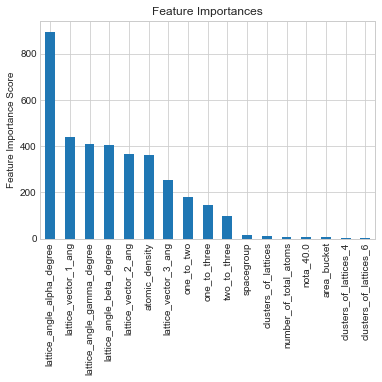

In [26]:
xgb_target1 = XGBRegressor(learning_rate=0.1,n_estimators=1000,max_depth=8,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27) 
xgb_target1_fit = modelfit(xgb_target1,dtrain,dtest,features,target1,useTrainCV=True)

In [27]:
xgb_target1_fit.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=47, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)>

In [48]:
param_test1 = {
    'max_depth': [5,6,7,8,9],
    'min_child_weight': [1,2,3,4,5,6],
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
print( gsearch1.best_params_, gsearch1.best_score_
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target1].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target1].values, dtest_predictions)))

{'max_depth': 5, 'min_child_weight': 3} -0.008091910348804748

Model Report
Accuracy train: 0.063
Accuracy test : 0.09422


In [38]:
param_test1 = {
   'gamma': [0,0.5,1,10,100,1000]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=6,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
print( gsearch1.best_params_, gsearch1.best_score_)
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target1].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target1].values, dtest_predictions)))

{'gamma': 0} -0.008045887924826352

Model Report
Accuracy train: 0.05785
Accuracy test : 0.09568


In [51]:
param_test1 = {
   'subsample': [0.7,0.8,0.9,1],
    'colsample_bytree': [0.7,0.8,0.9,1]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=6,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
print( gsearch1.best_params_, gsearch1.best_score_)
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target1].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target1].values, dtest_predictions)))

{'colsample_bytree': 0.8, 'subsample': 0.8} -0.008045887924826352

Model Report
Accuracy train: 0.05785
Accuracy test : 0.09568


In [56]:
param_test1 = {
 'reg_lambda':[1,1.33,1.66,5,6]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=6,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,reg_alpha=0,reg_lambda=0.01,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
print( gsearch1.best_params_, gsearch1.best_score_)
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target1].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target1].values, dtest_predictions)))

{'reg_lambda': 5} -0.007945763639617654

Model Report
Accuracy train: 0.06272
Accuracy test : 0.09283


In [59]:
param_test1 = {
 'reg_alpha':[0,0.33,0.66,1,1.33,1.66,5,6]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=6,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,reg_alpha=0,reg_lambda=5,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
print( gsearch1.best_params_, gsearch1.best_score_)
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target1].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target1].values, dtest_predictions)))

{'reg_alpha': 0} -0.007945763639617654

Model Report
Accuracy train: 0.06272
Accuracy test : 0.09283


In [65]:
features = ['lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang', 'number_of_total_atoms','one_to_two', 'one_to_three', 'two_to_three',
       'bucket_sg_ratio_1', 'bucket_sg_ratio_2', 'clusters_of_lattices',
       'clusters_of_lattices_0', 'clusters_of_lattices_1',
       'clusters_of_lattices_2', 'clusters_of_lattices_3', 'clusters_of_lattices_7',
       'clusters_of_lattices_8', 'clusters_of_lattices_9','area_bucket', 'atomic_density', 'nota_10.0', 'nota_20.0', 'nota_30.0',
       'nota_40.0', 'nota_60.0', 'nota_80.0']


Model Report
Accuracy train: 0.06285
Accuracy test : 0.09289


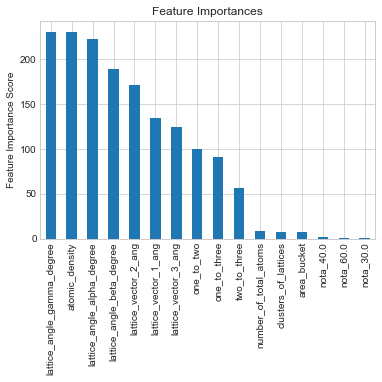

In [66]:
xgbRegressor_1 = XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=6,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,reg_alpha=0,reg_lambda=5,seed=27)
xgbFit1 = modelfit(xgbRegressor_1,dtrain,dtest,features,target1,useTrainCV=False,early_stopping_rounds=5)


Model Report
Accuracy train: 0.07059
Accuracy test : 0.09208


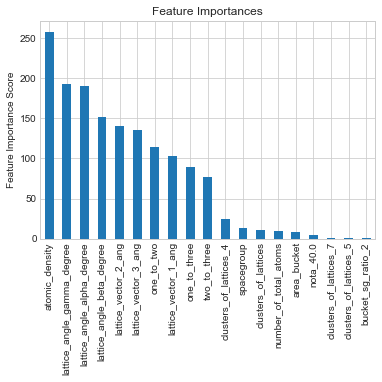

In [68]:
xgbRegressor_1 = XGBRegressor(learning_rate=0.07,n_estimators=175,max_depth=4,min_child_weight=20,gamma=0,subsample=0.8,colsample_bytree=0.7,objective='reg:linear',nthread=4,reg_alpha=0,reg_lambda=5,seed=27)
xgbFit1 = modelfit(xgbRegressor_1,dtrain,dtest,features,target1,useTrainCV=False,early_stopping_rounds=5)


Model Report
Accuracy train: 0.02375
Accuracy test : 0.03882


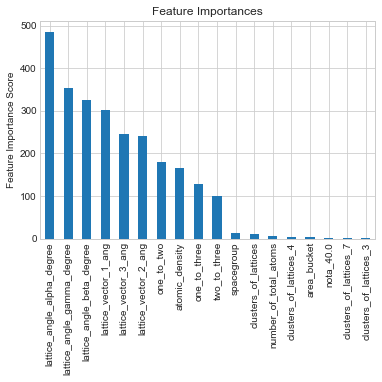

In [72]:
xgb_target2 = XGBRegressor(learning_rate=0.1,n_estimators=1000,max_depth=8,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27) 
xgb_target2_fit = modelfit(xgb_target2,dtrain,dtest,features,target2,useTrainCV=True)

In [73]:
xgb_target2_fit.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=None, n_estimators=52, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)>

In [78]:
param_test1 = {
    'max_depth': [5,6,7,8,9],
    'min_child_weight': [1,2,3,4,5,6],
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=8,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target2])
print( gsearch1.best_params_, gsearch1.best_score_)
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target2].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target2].values, dtest_predictions)))

{'max_depth': 7, 'min_child_weight': 5} -0.001385824949965411

Model Report
Accuracy train: 0.02572
Accuracy test : 0.03897


In [80]:
param_test1 = {
   'subsample': [0.7,0.8,0.9,1],
    'colsample_bytree': [0.6,0.7,0.8,0.9]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=7,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target2])
print( gsearch1.best_params_, gsearch1.best_score_)
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target2].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target2].values, dtest_predictions)))

{'colsample_bytree': 0.9, 'subsample': 0.8} -0.0013773502990339166

Model Report
Accuracy train: 0.02521
Accuracy test : 0.03866


In [83]:
param_test1 = {
 'reg_lambda':[0.5,0.8,1,3,5,10]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=7,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.9,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target2])
print( gsearch1.best_params_, gsearch1.best_score_)
dtrain_predictions = gsearch1.predict(dtrain[features])
dtest_predictions  = gsearch1.predict(dtest[features])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#Print model report:
print ("\nModel Report")
print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target2].values, dtrain_predictions)))
print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target2].values, dtest_predictions)))

{'reg_lambda': 1} -0.0013773502990339166

Model Report
Accuracy train: 0.02521
Accuracy test : 0.03866



Model Report
Accuracy train: 0.02544
Accuracy test : 0.03855


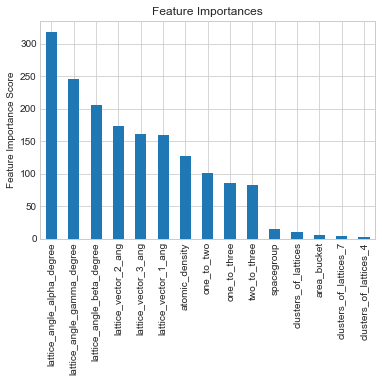

In [143]:
xgbRegressor_2 = XGBRegressor(learning_rate=0.1,n_estimators=57,max_depth=7,min_child_weight=5,gamma=0.001,subsample=0.8,colsample_bytree=0.9,objective='reg:linear',nthread=4,reg_alpha=0,reg_lambda=1,seed=27)
xgbFit2 = modelfit(xgbRegressor_2,dtrain,dtest,features,target2,useTrainCV=False,early_stopping_rounds=5)

In [144]:
formation_prediction = np.exp(xgbFit2.predict(test[features]))-1
bandgap_prediction = np.exp(xgbFit1.predict(test[features]))-1

In [200]:
formation_prediction_got = pd.read_csv("formation_prediction.csv")
formation_prediction_got.head()

,id,formation_prediction
0,1,0.181465
1,2,0.058433
2,3,0.161261
3,4,0.036078
4,5,0.143187


In [201]:
hamse_ho_jayega = test[['id']]
hamse_ho_jayega['bandgap_energy_ev'] = (bandgap_prediction + test_predictions_band_linear)/2

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [197]:
hamse_ho_jayega.head()

,id,bandgap_energy_ev,formation_energy_ev_natom
0,1,1.618139,0.181465
1,2,3.834379,0.058433
2,3,3.379246,0.161261
3,4,3.002432,0.036078
4,5,1.652196,0.143187


In [202]:
hamse_ho_jayega['formation_energy_ev_natom'] = formation_prediction_got['formation_prediction']

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [187]:
hamse_ho_jayega1 = pd.merge(hamse_ho_jayega,formation_prediction_got,how="left",left_on='id',right_on='id')

In [190]:
hamse_ho_jayega['formation_energy_ev_natom'] = hamse_ho_jayega['formation_prediction']

In [191]:
hamse_ho_jayega = hamse_ho_jayega[['bandgap_energy_ev','formation_energy_ev_natom']]

In [204]:
hamse_ho_jayega.to_csv("hamse_ho_jayega.csv",index=False)

In [203]:
hamse_ho_jayega.tail()

,id,bandgap_energy_ev,formation_energy_ev_natom
595,596,1.354007,0.040028
596,597,0.936355,0.243379
597,598,0.711649,0.109272
598,599,2.216689,0.246124
599,600,2.169526,0.201883


In [2]:
!pip install tensorflow-gpu


  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\imamk\AppData\Local\pip\Cache\wheels\45\07\0e\6880381ca521796cf6cc18ba4ab502c2232e5777099b4df4ae
  Running setup.py bdist_wheel for html5lib: started
  Running setup.py bdist_wheel for html5lib: finished with status 'done'
  Stored in directory: C:\Users\imamk\AppData\Local\pip\Cache\wheels\6f\85\6c\56b8e1292c6214c4eb73b9dda50f53e8e977bf65989373c962
Successfully built absl-py html5lib
  Found existing installation: html5lib 0.999999999
    Uninstalling html5lib-0.999999999:
      Successfully uninstalled html5lib-0.999999999
  Found existing installation: bleach 2.0.0
    Uninstalling bleach-2.0.0:
      Successfully uninstalled bleach-2.0.0
